In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# Set random seed
np.random.seed(42)

In [2]:
data = pd.read_csv('data.csv', index_col=0)
import sklearn.utils
data = sklearn.utils.shuffle(data)

labels = np.ravel(data[['type']],order='C')
data.drop(['date', 'userId', 'lat', 'lon', 'location', 'device', 'zip', 'zipcode', 'pressure', 'windDeg'],axis=1, inplace=True)
data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 481 entries, 41F3F63D-D7EE-4C7B-958E-414C89B37170 to 5f159ad0-6ad1-11e7-908f-4b064f587a76
Data columns (total 7 columns):
clouds         481 non-null int64
humidity       481 non-null int64
temp           481 non-null float64
type           481 non-null int64
visibility     481 non-null int64
weatherCond    481 non-null object
windSpeed      481 non-null float64
dtypes: float64(2), int64(4), object(1)
memory usage: 30.1+ KB


In [3]:
#force df to have same # of hot / iced rows
hot = data.loc[data.type == 1]
iced = data.loc[data.type == 0]

#remove all hot
data.drop(data[data.type == 1].index, inplace=True)

num_delete = hot.shape[0] - iced.shape[0]
indexes_to_keep = set(range(hot.shape[0])) - set(range(num_delete))
hot_sliced = hot.take(list(indexes_to_keep))

data = pd.concat([data, hot_sliced])
data['type'].value_counts()
labels = np.ravel(data[['type']],order='C')


In [4]:
print("iced", data[data['type']==0].shape)
print("hot",data[data['type']==1].shape)
# data.drop(['type'],axis=1, inplace=True)



iced (130, 7)
hot (130, 7)


In [5]:
#round data
def round(df):
    return df.apply(lambda x: np.rint(x))

data['temp'] = round(data['temp'])
# data['windDeg'] = round(data['windDeg'])
data['windSpeed'] = round(data['windSpeed'])

In [7]:
def to_bins(col, bins, lables):
    data[col] = pd.cut(data[col], bins=bins, labels=lables)
    return data[col]

def to_categorical(data, cat_vars):
    for var in cat_vars:
        cat_list='var'+'_'+var
        cat_list = pd.get_dummies(data[var], prefix=var)
        data1=data.join(cat_list)
        data=data1
    data = data.drop(cat_vars, axis=1)
    return data

In [8]:

#convert visibilty from meters to miles
def miles(meter):
    return round(meter/1609.344)

data['visibility'] = miles(data['visibility'])
# bins = [0, 1, 5, 20]
# vis_lables = [0,1,2]

# data['visibility'] = to_bins("visibility", bins=bins, lables=vis_lables)
# # data = to_categorical(data, cat_vars=['visibility'])


In [9]:
# clouds binning
# cloud_bins = [0, 25, 50, 100]
# cloud_labels = [0, 1, 2]

# data['clouds'] = to_bins("clouds", bins=cloud_bins, lables=cloud_labels)
# data = to_categorical(data, cat_vars=['clouds'])



In [10]:
# humidity binning
# data['humidity'].value_counts()
# humidity_bins = [0, 25, 50, 100]
# humidity_labels = [0, 1, 2]

# data['humidity'] = to_bins("humidity", bins=humidity_bins, lables=humidity_labels)
# data = to_categorical(data, cat_vars=['humidity'])



In [6]:
data.head()

,clouds,humidity,temp,type,visibility,weatherCond,windSpeed
A4738CE3-31CB-4ED5-92C3-221622C6AB13,90,100,59.0,0,12874,Mist,3.0
E7196991-1A2B-40C3-857B-00A076505AD6,1,87,51.0,0,16093,Fog,4.0
C36D9888-3CFC-49EC-BDB9-D6474E1B28A9,75,14,87.0,0,16093,Clouds,20.0
1DC4BEF2-664B-45F7-B6A5-2C6B51B41FEF,75,76,50.0,0,16093,Mist,6.0
5b0dcc40-680b-11e8-b79d-bf818eb3fc0d,75,77,58.0,0,16093,Rain,9.0


In [7]:
data['weatherCond']
for index,rows in data.iterrows():
    if ("cloud" in data.loc[index, 'weatherCond'].lower() or "overcast" in data.loc[index, 'weatherCond'].lower()):
        data.loc[index, 'weatherCond'] = 'Clouds'
        
    if ("snow" in data.loc[index, 'weatherCond'].lower()):
        data.loc[index, 'weatherCond'] = 'Snow'
        
    if ("rain" in data.loc[index, 'weatherCond'].lower() or "drizzle" in data.loc[index, 'weatherCond'].lower() or "mist" in data.loc[index, 'weatherCond'].lower()):
        data.loc[index, 'weatherCond'] = 'Rain'
        
    if ("none" in data.loc[index, 'weatherCond'].lower()):
        data.loc[index, 'weatherCond'] = 'Clear'
    

data['weatherCond'].value_counts()

Clouds    116
Clear      67
Rain       56
Fog         9
Haze        6
Snow        4
Smoke       2
Name: weatherCond, dtype: int64

In [8]:
# one- hot encoding
cat_vars=['weatherCond']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(data[var], prefix=var)
    data1=data.join(cat_list)
    data=data1
data = data.drop(['weatherCond'], axis=1)
data.head()

,clouds,humidity,temp,type,visibility,windSpeed,weatherCond_Clear,weatherCond_Clouds,weatherCond_Fog,weatherCond_Haze,weatherCond_Rain,weatherCond_Smoke,weatherCond_Snow
A4738CE3-31CB-4ED5-92C3-221622C6AB13,90,100,59.0,0,12874,3.0,0,0,0,0,1,0,0
E7196991-1A2B-40C3-857B-00A076505AD6,1,87,51.0,0,16093,4.0,0,0,1,0,0,0,0
C36D9888-3CFC-49EC-BDB9-D6474E1B28A9,75,14,87.0,0,16093,20.0,0,1,0,0,0,0,0
1DC4BEF2-664B-45F7-B6A5-2C6B51B41FEF,75,76,50.0,0,16093,6.0,0,0,0,0,1,0,0
5b0dcc40-680b-11e8-b79d-bf818eb3fc0d,75,77,58.0,0,16093,9.0,0,0,0,0,1,0,0


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 260 entries, A4738CE3-31CB-4ED5-92C3-221622C6AB13 to 5f159ad0-6ad1-11e7-908f-4b064f587a76
Data columns (total 13 columns):
clouds                260 non-null int64
humidity              260 non-null int64
temp                  260 non-null float64
type                  260 non-null int64
visibility            260 non-null int64
windSpeed             260 non-null float64
weatherCond_Clear     260 non-null uint8
weatherCond_Clouds    260 non-null uint8
weatherCond_Fog       260 non-null uint8
weatherCond_Haze      260 non-null uint8
weatherCond_Rain      260 non-null uint8
weatherCond_Smoke     260 non-null uint8
weatherCond_Snow      260 non-null uint8
dtypes: float64(2), int64(4), uint8(7)
memory usage: 26.0+ KB


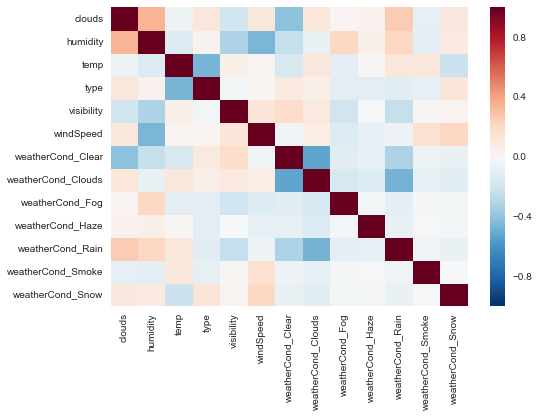

In [15]:
import seaborn as sns
corr = data.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [10]:
data.drop(['type'],axis=1, inplace=True)

In [11]:
print("data",data.shape)
print("labels", labels.shape)

data (260, 12)
labels (260,)


In [12]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
rfe = RFE(model, 4)
rfe = rfe.fit(data, labels)
print(rfe.support_)
print(rfe.ranking_)

[False False False False False False False  True  True False  True  True]
[7 8 5 9 6 2 3 1 1 4 1 1]


In [13]:
X = data#data[['lat','lon', 'temp', 'windSpeed']]
y = labels
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


/Users/antoniohung/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [ ]:
#save X_test


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

from sklearn.metrics import accuracy_score
print('Logistic regression accuracy: {:.3f}'.format(accuracy_score(y_test, logreg.predict(X_test))))

In [20]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [21]:
from sklearn.metrics import accuracy_score
print('Logistic regression accuracy: {:.3f}'.format(accuracy_score(y_test, logreg.predict(X_test))))

Logistic regression accuracy: 0.692


In [22]:
#random forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
print('Random Forest Accuracy: {:.3f}'.format(accuracy_score(y_test, rf.predict(X_test))))

Random Forest Accuracy: 0.769


In [23]:
#SVM
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
print('Support vector machine accuracy: {:.3f}'.format(accuracy_score(y_test, svc.predict(X_test))))              

Support vector machine accuracy: 0.667


In [24]:
from sklearn import model_selection as ms
from sklearn.model_selection import cross_val_score
scoring = 'accuracy'


kfoldMean = ms.cross_val_score(svc, X_train, y_train, cv = ms.KFold(), scoring=scoring).mean()
Kfold_shuggle = ms.cross_val_score(svc, X_train, y_train, cv = ms.KFold(shuffle = True), scoring=scoring).mean()
print(kfoldMean)
print(Kfold_shuggle)

0.604371584699
0.599180327869


In [26]:
#save mode
import pickle
# filename = 'svc.sav'
filename = 'models/rf.sav'
pickle.dump(rf, open(filename, 'wb'), protocol=2)

In [27]:

#save mode
import pickle
filename = 'models/logreg.sav'
# filename = 'rf.sav'
pickle.dump(logreg, open(filename, 'wb'), protocol=2)

In [ ]:
file = open(filename, 'rb')
svc = pickle.load(file)
svc